In [1]:
import scipy.stats as s
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import empiricaldist as empd

In [3]:
def make_pmf(func, mu, range_, pmf=True):
    distribution = func(mu)
    if pmf:
        probs = distribution.pmf(range_)
    else:
        probs = distribution.pdf(range_)
    pmf = empd.Pmf(probs, range_)
    pmf.normalize()
    return pmf

In [14]:
goals = np.arange(10)
probs = s.poisson(1.4).pmf(goals)

In [15]:
pmf_goals = make_pmf(
    s.poisson,
    1.4,
    goals
)

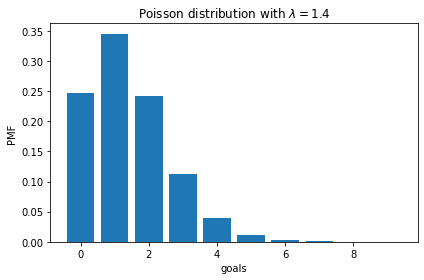

In [16]:
plt.bar(goals, probs)
from utils import decorate

decorate(xlabel='goals', ylabel='PMF', title=r'Poisson distribution with $\lambda=1.4$')

In [17]:
pmf_lambdas = make_pmf(
    s.gamma,
    1.4,
    np.linspace(0, 10, 101),
    False
)

<AxesSubplot:>

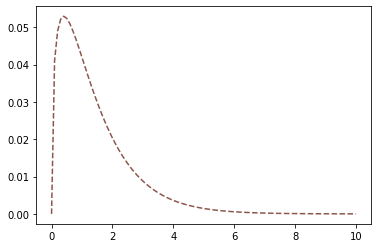

In [18]:
pmf_lambdas.plot(ls='--', label='prior', color='C5')

In [15]:
def update_poisson(pmf, data):
    """Update Pmf with a Poisson likelihood."""
    k = data
    lams = pmf.qs
    likelihood = s.poisson(lams).pmf(k)
    pmf *= likelihood
    pmf.normalize()

In [24]:
france = pmf_lambdas.copy()
croatia = pmf_lambdas.copy()

In [25]:
update_poisson(france, 4)
update_poisson(croatia, 2)

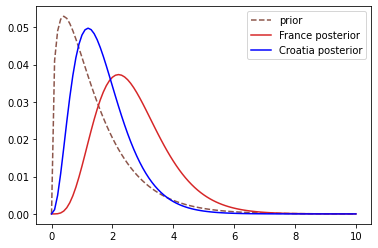

In [29]:
pmf_lambdas.plot(ls='--', label='prior', color='C5')
france.plot(label='France posterior', color='C3')
croatia.plot(label='Croatia posterior', color='blue')
plt.legend()

In [30]:
empd.Pmf.prob_gt(france, croatia)

0.7499366290930174

In [31]:
empd.Pmf.prob_eq(france, croatia)

0.022793449538185857

If we knew the goal scoring rate, lam, the distribution of goals would be a Poisson distribution with parameter lam. Since we don’t know lam, the distribution of goals is a mixture of a Poisson distributions with different values of lam

In [33]:
pmf_seq = [
    make_pmf(s.poisson, lam, goals) 
    for lam in pmf_lambdas.qs
]

In [16]:
from utils import make_mixture

pred_france = make_mixture(france, pmf_seq)

NameError: name 'france' is not defined

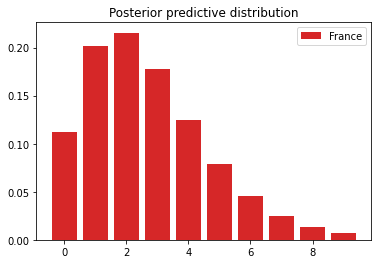

In [35]:
pred_france.bar(color='C3', label='France')
plt.title('Posterior predictive distribution')
plt.legend()

In [36]:
pred_croatia = make_mixture(croatia, pmf_seq)

In [37]:
print(
    'Prob of Frnace winning:',
    empd.Pmf.prob_gt(pred_france, pred_croatia)
)

Prob of Frnace winning: 0.5703522415934519


In [40]:
pred_france.prob_ge(2)

0.6861929546056647

In [39]:
pred_croatia.mean()

1.6945552049476682

In [17]:
from utils import make_joint

In [39]:
def create_mask(gt=3.5, n=10):
    cols, rows = np.meshgrid(np.arange(n),np.arange(n))
    mask = cols+rows
    return mask > gt

In [52]:
joint = make_joint(pred_france, pred_croatia)
print(type(joint))
joint

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9
0,0.028227,0.050839,0.054289,0.044721,0.031397,0.019762,0.011490,0.006291,0.003287,0.001655
1,0.031994,0.057624,0.061533,0.050689,0.035587,0.022399,0.013023,0.007131,0.003726,0.001876
2,0.023469,0.042270,0.045138,0.037183,0.026105,0.016431,0.009553,0.005231,0.002733,0.001376
3,0.014090,0.025377,0.027099,0.022323,0.015672,0.009865,0.005735,0.003140,0.001641,0.000826
4,0.007523,0.013550,0.014469,0.011919,0.008368,0.005267,0.003062,0.001677,0.000876,0.000441
5,0.003718,0.006697,0.007151,0.005891,0.004136,0.002603,0.001514,0.000829,0.000433,0.000218
6,0.001740,0.003134,0.003347,0.002757,0.001936,0.001218,0.000708,0.000388,0.000203,0.000102
7,0.000782,0.001409,0.001505,0.001240,0.000870,0.000548,0.000318,0.000174,0.000091,0.000046
8,0.000341,0.000615,0.000656,0.000541,0.000380,0.000239,0.000139,0.000076,0.000040,0.000020
9,0.000145,0.000262,0.000279,0.000230,0.000162,0.000102,0.000059,0.000032,0.000017,0.000009


In [66]:
mask = create_mask(4.5)
(joint*mask).values.sum()

0.4308202289793873

# Time between the goals

In [69]:
def expo_pdf(t, lam):
    """Compute the PDF of the exponential distribution."""
    return lam * np.exp(-lam * t)

In [70]:
lam = 1.4
qs = np.linspace(0, 4, 101)
ps = expo_pdf(qs, lam)
pmf_time = empd.Pmf(ps, qs)
pmf_time.normalize()

25.616650745459093

<AxesSubplot:>

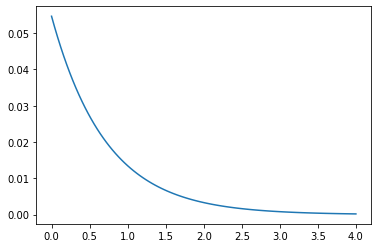

In [71]:
pmf_time.plot()

In [74]:
germany = pmf_lambdas.copy()

In [19]:
def update_exponential(pmf, time):
    lambdas = pmf.qs
    likelihood = expo_pdf(time, lambdas)
    pmf *= likelihood
    pmf.normalize()

In [75]:
update_exponential(germany, 11/90)

<AxesSubplot:>

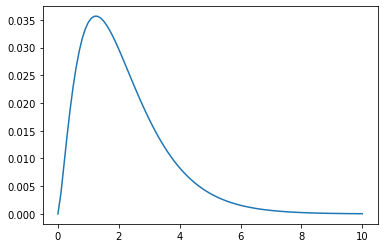

In [76]:
germany.plot()

In [77]:
germany.mean()

2.1358882653086892

In [78]:
update_exponential(germany, 12/90)

In [79]:
germany.mean()

2.703059034926364

In [98]:
t = (90-23) / 90
pmf_seq = [
    make_pmf(s.poisson, lam*t, goals)
    for lam in pmf_lambdas.qs
]

In [99]:
pmf_mixture = make_mixture(germany, pmf_seq)

In [100]:
pmf_mixture.mean()

1.9994371012513807

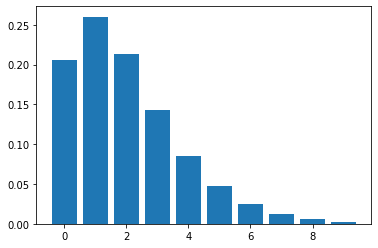

In [101]:
pmf_mixture.bar()

In [102]:
pmf_mixture.prob_ge(5)

0.09286200122834538

In [103]:
pmf_mixture.prob_eq(5)

0.047109658706113416

# france to score

In [118]:
def make_expo_pmf(lam):
    # 4 matches
    qs = np.linspace(0, 4, 101)
    ps = expo_pdf(qs, lam)
    pmf = empd.Pmf(ps, qs)
    pmf.normalize()
    return pmf
    

In [119]:
pmf_seq = [
    make_expo_pmf(lam)
    for lam in pmf_lambdas.qs
]

<AxesSubplot:>

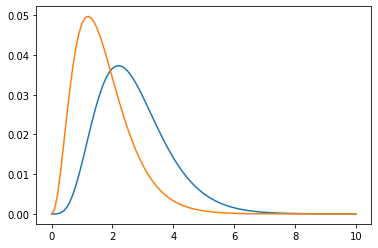

In [124]:
france.plot()
croatia.plot()

In [120]:
france_to_score = make_mixture(france, pmf_seq)
croatia_to_score = make_mixture(croatia, pmf_seq)

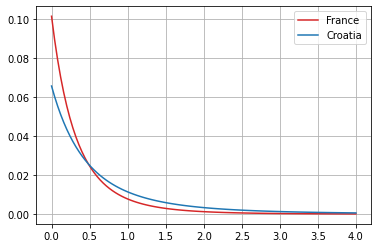

In [121]:
france_to_score.plot(label='France', color='C3')
croatia_to_score.plot(label='Croatia', color='C0')
plt.legend()
plt.grid()

In [125]:
print(
    'France to score first:',
    empd.Pmf.prob_lt(france_to_score, croatia_to_score)
)

France to score first: 0.5904596116867543


# NHL BOS - VAN Problem 

In [23]:
prior_team = make_pmf(s.poisson, 2.8, list(range(0, 15, 1)))
prior_goal = make_pmf(s.gamma, 2.8, np.linspace(0, 15, 201), False)

<AxesSubplot:>

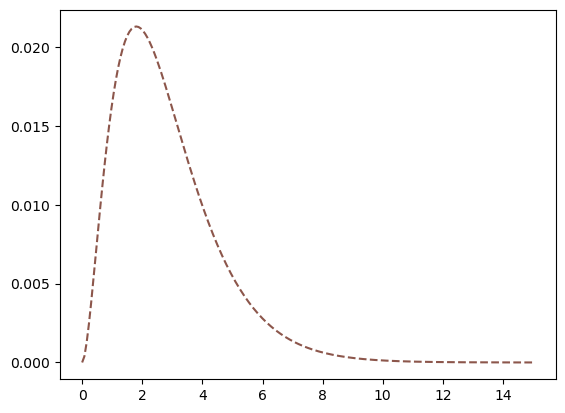

In [24]:
prior_goal.plot(ls='--', label='prior', color='C5')

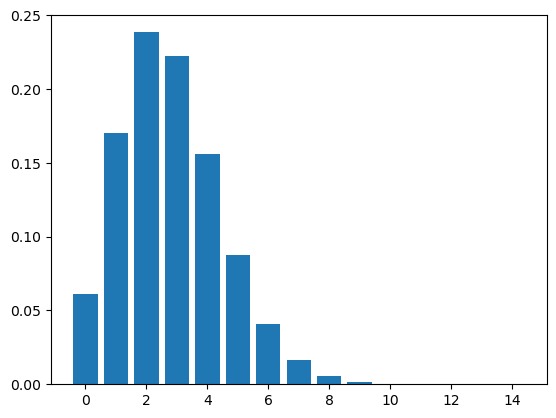

In [12]:
prior_team.bar()

In [25]:
matches = [
    # bos - van
    (0,1),
    (2,3),
    (8,1),
    (4,0)
]

bos = prior_goal.copy()
van = prior_goal.copy()


In [26]:
for bos_g, van_g in matches:
    update_poisson(bos, bos_g)
    update_poisson(van, van_g)

9

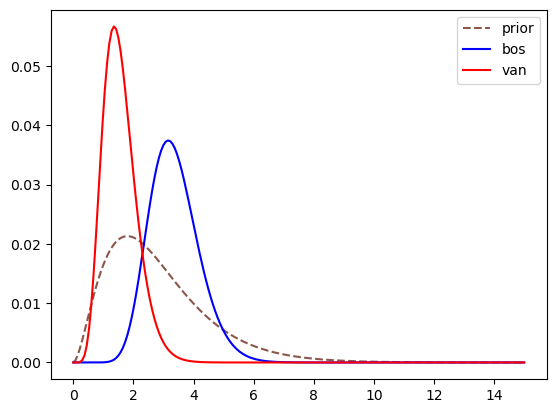

In [28]:
prior_goal.plot(ls='--', label='prior', color='C5')
bos.plot(label='bos', color='blue')
van.plot(label='van', color='red')
plt.legend()
9

In [29]:
pmf_seq = [make_pmf(s.poisson, lam, np.arange(15), True) 
           for lam in prior_goal.qs]

In [30]:
pred_bos = make_mixture(bos, pmf_seq)
pred_van = make_mixture(van, pmf_seq)

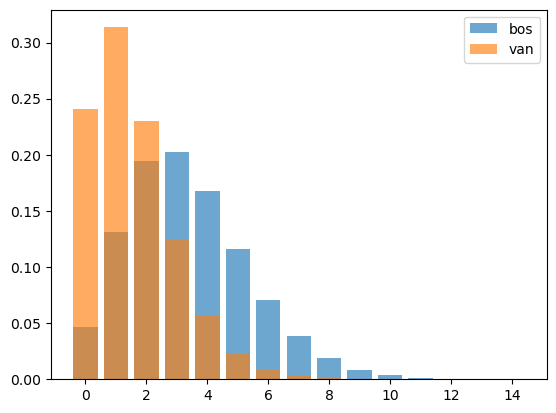

In [31]:
pred_bos.bar(label='bos', alpha=0.65)
pred_van.bar(label='van', alpha=0.65)
plt.legend()


In [32]:
empd.Pmf.prob_gt(pred_bos, pred_van)

0.7038631446376565

In [33]:
empd.Pmf.prob_lt(pred_bos, pred_van)

0.16111691274519194

In [34]:
empd.Pmf.prob_eq(pred_bos, pred_van)

0.13501994261715172

In [50]:
# Assuming the Bruins win half of the ties,
# their chance of winning the next game is
p = empd.Pmf.prob_gt(pred_bos, pred_van) + empd.Pmf.prob_eq(pred_bos, pred_van)/2


# Their chance of winning the series is their
# chance of winning k=2 or k=3 of the remaining
# n=3 games.

from scipy.stats import binom

n = 3
a = binom.pmf([2,3], n, p)
a.sum()

0.8670900134017998

In [51]:
joint_dist = make_joint(pred_bos, pred_van)
mask = create_mask(4.5, 15)
# print(joint_dist)
# print(mask)

In [52]:
o = (joint_dist * mask ).sum().sum()
u = 1-o
print(1/o)
print(1/u)

1.884975992903814
2.1299741552522407


In [53]:
b = empd.Pmf.prob_gt(pred_bos, pred_van) 
v = empd.Pmf.prob_lt(pred_bos, pred_van)
b_dnb = b / (b+v)
v_dnb = 1 - b
print(1/b_dnb, 1/v_dnb)

1.2289037492197914 3.3768171096989343


In [55]:
1/0.86

1.1627906976744187

In [57]:
1/1.3

0.7692307692307692

In [65]:
w = [1,2,0,2,4,6]
l = [0,0,1,1,1,1]

In [66]:
s = sum(l)+sum(w)

In [67]:
sum(w)/s

0.7894736842105263

In [61]:
1/1.3

0.7692307692307692